In [90]:
import pandas as pd

In [91]:
# 1.a Dataset preparation
# Read the data from the csv file
df = pd.read_csv("heart.csv")

print("Number of examples: ", str(len(df)))
print("number of angiographic disease: ", str(len(df[df.output == 1])))
print("number of healty examples: ", str(len(df[df.output == 0])))
df.dtypes
df.describe()


Number of examples:  303
number of angiographic disease:  165
number of healty examples:  138


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [92]:
# 1.b Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [93]:
# 1.c Split the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop('output', axis=1)
y = df['output']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print("Number of training examples: ", str(len(X_train_val)))
print("Number of test examples: ", str(len(X_test)))
print("Number of angiographic disease in training set: ", str(len(y_train_val[y_train_val == 1])))
print("Number of healty examples in training set: ", str(len(y_train_val[y_train_val == 0])))

Number of training examples:  242
Number of test examples:  61
Number of angiographic disease in training set:  129
Number of healty examples in training set:  113


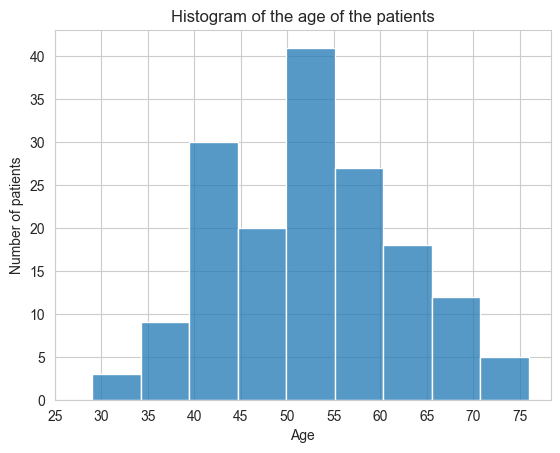

In [94]:
# 2.a Histogram of the age of the patients
import seaborn as sns
import matplotlib.pyplot as plt
hist = sns.histplot(data=df[df.output == 1], x="age")
sns.set_style("whitegrid")
plt.title('Histogram of the age of the patients')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.xticks(range(25, max(df['age'])+1, 5))  # Set x-ticks every 5 years
plt.show()


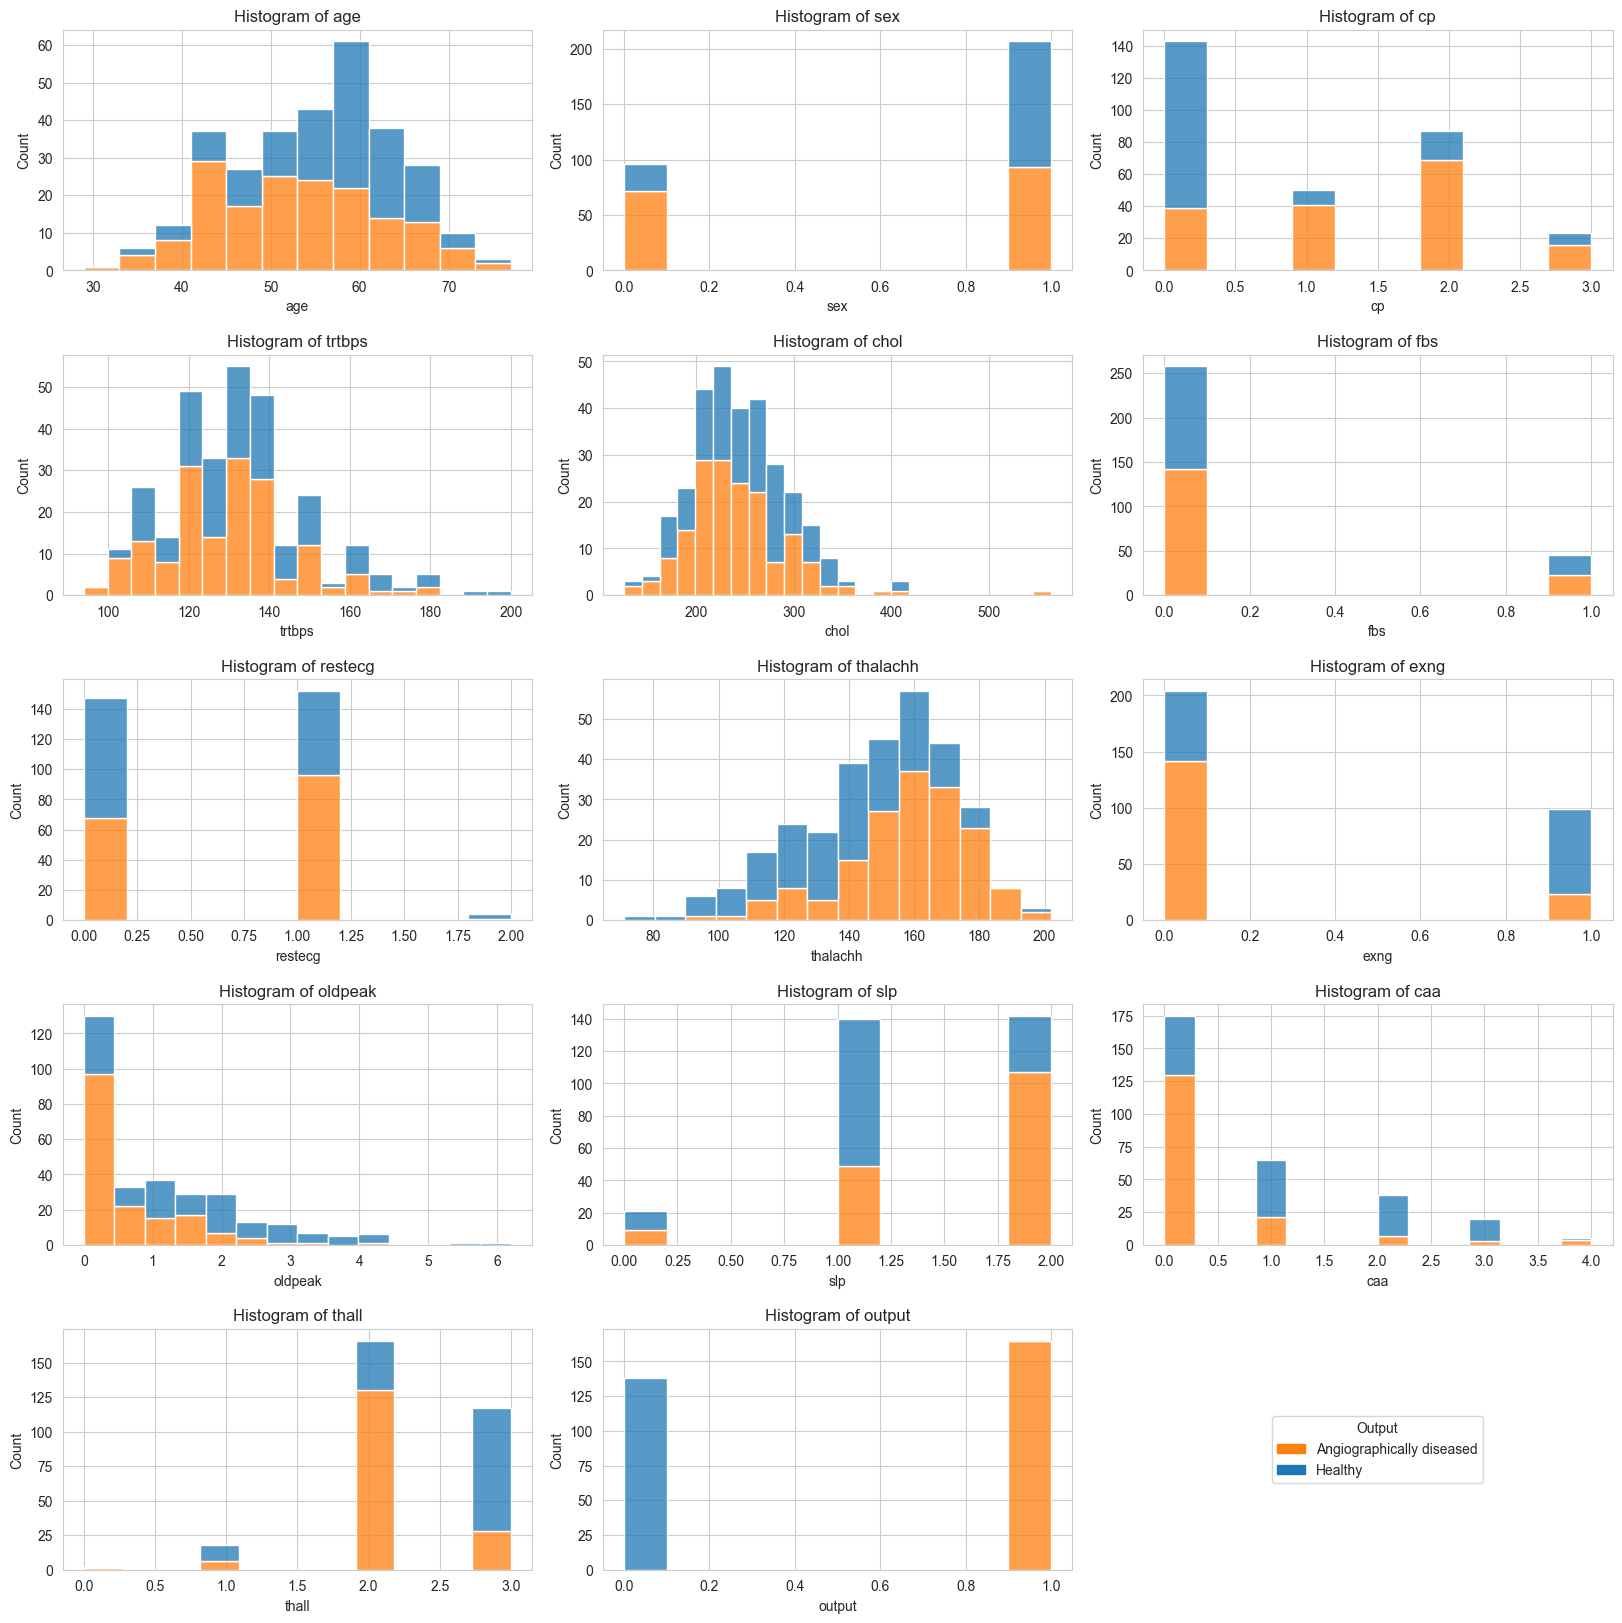

In [95]:
# 2.b. Histograms of all the features
import matplotlib.patches as mpatches
plt.figure(figsize=(20, 20))

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, (i + 1))
    sns.histplot(data=df, x=df.columns[i], hue="output", multiple="stack", legend=False)
    plt.title('Histogram of ' + df.columns[i])
    plt.xlabel(df.columns[i])
    plt.ylabel('Count')

# Add the legend to the empty subplot
plt.subplot(5, 3, len(df.columns)+1)
plt.axis('off')  # Hide the axes
colors = sns.color_palette()
orange_patch = mpatches.Patch(color=colors[1], label='Angiographically diseased')
blue_patch = mpatches.Patch(color=colors[0], label='Healthy')
plt.legend(handles=[orange_patch, blue_patch], title='Output', loc='center')
plt.subplots_adjust(hspace=0.35, wspace=0.15)

plt.show()

<Axes: >

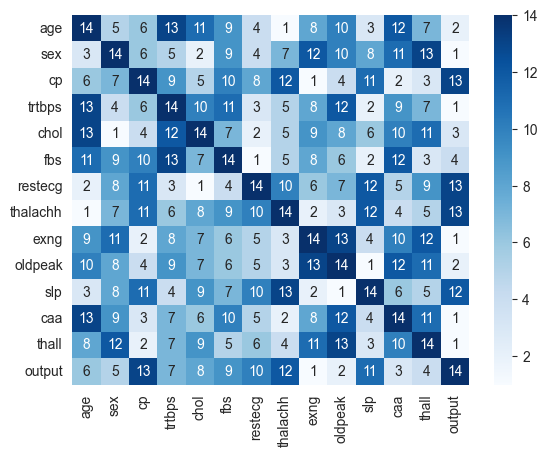

In [96]:
# 2.c
# Correlation matrix
corr = df.corr()
sns.heatmap(corr.rank(axis='columns'),cmap='Blues',annot=True)
# darker shades represent higher correlation
# lighter shades represent lower correlation

In [97]:
# preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()

scaler = StandardScaler()
le = LabelEncoder()

for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = scaler.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)


df = pd.concat([num_cols,cat_cols],axis = 1)

In [98]:
# split after preprocessing
from sklearn.model_selection import train_test_split
X = df.drop('output', axis=1)
y = df['output']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print("Number of training examples: ", str(len(X_train_val)))
print("Number of test examples: ", str(len(X_test)))
print("Number of angiographic disease in training set: ", str(len(y_train_val[y_train_val == 1])))
print("Number of healty examples in training set: ", str(len(y_train_val[y_train_val == 0])))

Number of training examples:  242
Number of test examples:  61
Number of angiographic disease in training set:  129
Number of healty examples in training set:  113


In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_auc_score

knn_model = KNeighborsClassifier(n_neighbors=32) 
dt_model = DecisionTreeClassifier( max_depth=4, min_samples_split=5, min_samples_leaf=5)
mlp_model = MLPClassifier(hidden_layer_sizes=(13,13), max_iter=500, activation='relu', solver='adam', alpha=1e-5)

acc_log_knn=[]
acc_log_dt=[]
acc_log_mlp = []


def train_knn_model(X_train, y_train, X_val, y_val,  fold_no):
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_val)
    report = classification_report(y_val, y_pred)
    # print("classification_report: \n", report)

    acc=roc_auc_score(y_val, y_pred)
    acc_log_knn.append([acc, report, y_pred, knn_model])
    # print(f"The accuracy for Fold {fold_no} : {acc}")

def train_decision_tree_model(X_train, y_train, X_val, y_val, fold_no):
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_val)
    report = classification_report(y_val, y_pred)
    # print("classification_report: \n", report)

    acc=roc_auc_score(y_val, y_pred)
    acc_log_dt.append([acc, report, y_pred,dt_model])
    # print(f"The accuracy for Fold {fold_no} : {acc}")

def train_mlp_model(X_train, y_train, X_val, y_val, fold_no):
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_val)
    report = classification_report(y_val, y_pred)
    # print("classification_report: \n", report)
    acc=roc_auc_score(y_val, y_pred)
    acc_log_mlp.append([acc, report, y_pred, mlp_model])
    # print(f"The accuracy for Fold {fold_no} : {acc}")



In [128]:
# 3 Split the training set into k-fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

k_fold = 5
kf = StratifiedKFold(n_splits=k_fold)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_val, y_train_val)):
    print("Fold: ", str(fold + 1))

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_val=ro_scaler.transform(X_val)

    train_knn_model(X_train, y_train, X_val, y_val,  fold+1)
    
    train_decision_tree_model(X_train, y_train, X_val, y_val,  fold+1)

    train_mlp_model(X_train, y_train, X_val, y_val,  fold+1)


Fold:  1
Fold:  2


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold:  3
Fold:  4


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold:  5


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
# model results
max_acc_knn = max(acc_log_knn)
max_acc_dt = max(acc_log_dt)
max_acc_mlp = max(acc_log_mlp)

print("Accuracy scores")
print("K-NN ")
print("K-NN Score: ", str(max_acc_knn[0]))
print(max_acc_knn[1])

print("Decision Tree")
print("Decision Tree Score: ", str(max_acc_dt[0]))
print(max_acc_dt[1])

print("MLP")
print("MLP Score: ", str(max_acc_mlp[0]))
print(max_acc_mlp[1])

Accuracy scores
K-NN 
K-NN Score:  0.8947826086956521
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.88      0.92      0.90        25

    accuracy                           0.90        48
   macro avg       0.90      0.89      0.90        48
weighted avg       0.90      0.90      0.90        48

Decision Tree
Decision Tree Score:  0.8603678929765887
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.91      0.81      0.86        26

    accuracy                           0.86        49
   macro avg       0.86      0.86      0.86        49
weighted avg       0.86      0.86      0.86        49

MLP
MLP Score:  0.8745819397993311
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.86      0.92      0.89        26

    accuracy                          

Test set accuracy scores and Confusion matrix
K-NN 

accuracy_score:  0.7583333333333333


c:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


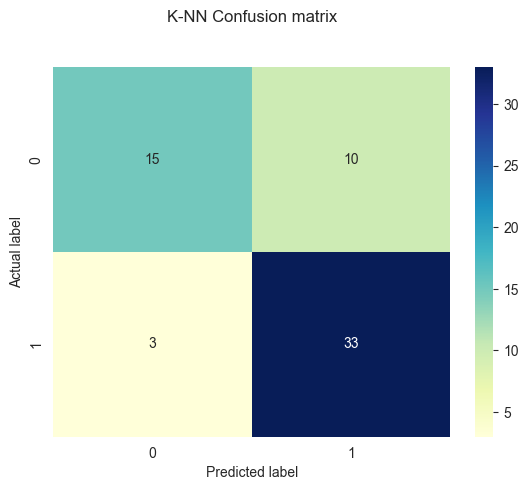

Decision Tree 

accuracy_score:  0.8027777777777779


c:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


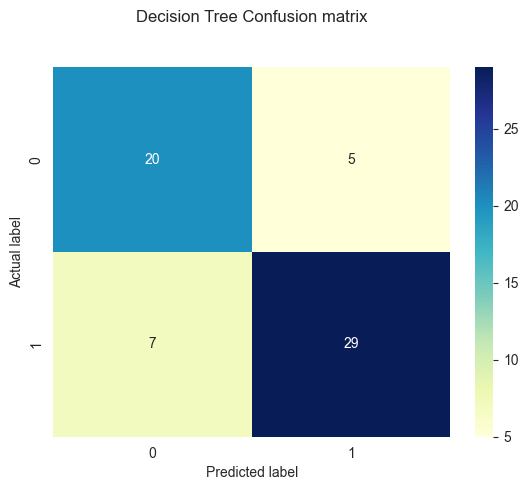

MLP 

accuracy_score:  0.7644444444444445


c:\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


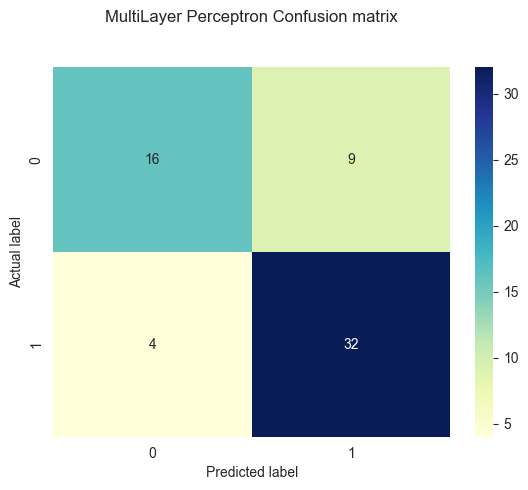

In [130]:
#4. test 
from sklearn.metrics import confusion_matrix



print("Test set accuracy scores and Confusion matrix")
print("K-NN \n")
y_pred = max_acc_knn[3].predict(X_test)
acc=roc_auc_score(y_test, y_pred)
print("accuracy_score: ", acc)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('K-NN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("Decision Tree \n")
y_pred = max_acc_dt[3].predict(X_test)
acc=roc_auc_score(y_test, y_pred)
print("accuracy_score: ", acc)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print("MLP \n")
y_pred = max_acc_mlp[3].predict(X_test)
acc=roc_auc_score(y_test, y_pred)
print("accuracy_score: ", acc)
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('MultiLayer Perceptron Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



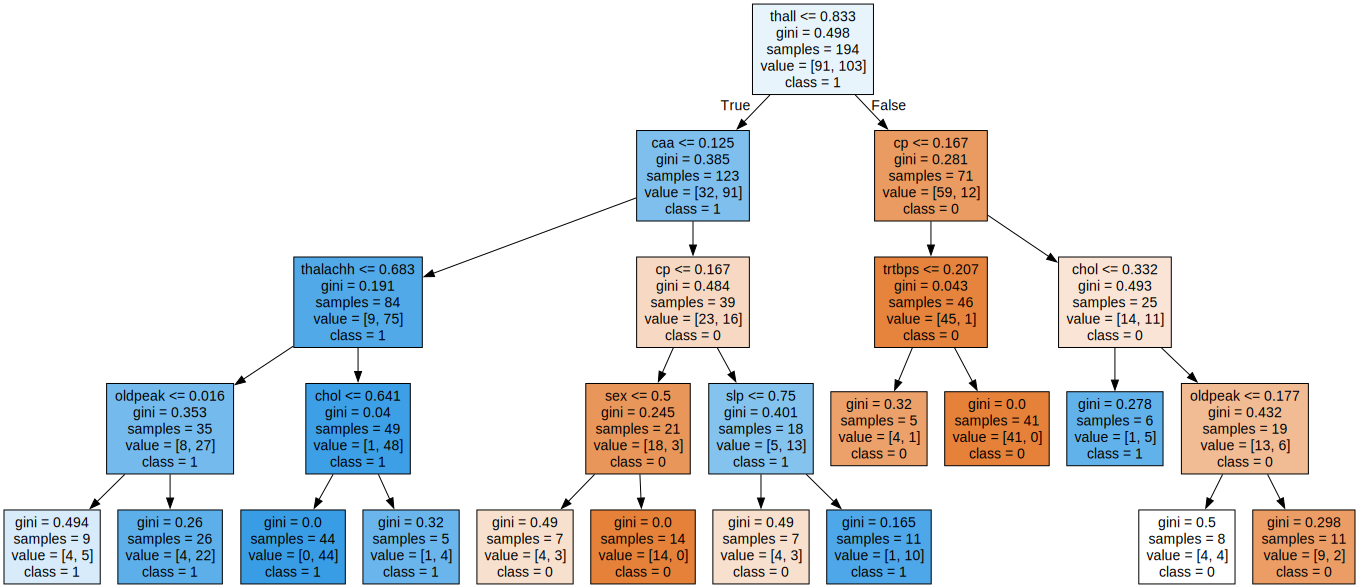

In [131]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=df.columns[:-1], class_names=['0', '1'], filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [107]:
# stochastic gradient descent
mlp_model = MLPClassifier(hidden_layer_sizes=(13,13), max_iter=500, batch_size=1, activation='relu', solver='sgd', alpha=1e-5)
acc_log_mlp = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_val, y_train_val)):
    print("Fold: ", str(fold + 1))

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_val=ro_scaler.transform(X_val)
    train_mlp_model(X_train, y_train, X_val, y_val,  fold+1)
    print("iteration", mlp_model.n_iter_)

max_acc_mlp = max(acc_log_mlp)
print("stochastic gradient descent")
print("MLP Score: ", str(max_acc_mlp[0]))
print(max_acc_mlp[1])
print("iteration for best result with stochastic gradient descent", str(max_acc_mlp[3].n_iter_))

Fold:  1
iteration 172
Fold:  2
iteration 195
Fold:  3
iteration 195
Fold:  4
iteration 145
Fold:  5
iteration 50
stochastic gradient descent
MLP Score:  0.8770903010033445
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.88      0.88      0.88        26

    accuracy                           0.88        49
   macro avg       0.88      0.88      0.88        49
weighted avg       0.88      0.88      0.88        49

iteration for best result with stochastic gradient descent 195


In [108]:
#batch gradient descent
mlp_model = MLPClassifier(hidden_layer_sizes=(13,13), max_iter=500, batch_size=32, activation='relu', solver='sgd', alpha=1e-5, early_stopping=True)

acc_log_mlp = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_val, y_train_val)):
    print("Fold: ", str(fold + 1))

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_val=ro_scaler.transform(X_val)
    train_mlp_model(X_train, y_train, X_val, y_val,  fold+1)
    print(mlp_model.n_iter_)

max_acc_mlp = max(acc_log_mlp)
print("MLP Score: ", str(max_acc_mlp[0]))
print(max_acc_mlp[1])
print("iteration for best result with batch gradient descent", str(max_acc_mlp[3].n_iter_))

Fold:  1
12
Fold:  2
18
Fold:  3
33
Fold:  4
12
Fold:  5
16
MLP Score:  0.6287625418060201
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        23
           1       0.64      0.69      0.67        26

    accuracy                           0.63        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.63      0.63      0.63        49

iteration for best result with batch gradient descent 18


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
#batch gradient descent
mlp_model = MLPClassifier(hidden_layer_sizes=(13,13), max_iter=500, batch_size=64, activation='relu', solver='sgd', alpha=1e-5, early_stopping=True)

acc_log_mlp = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_val, y_train_val)):
    print("Fold: ", str(fold + 1))

    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_val=ro_scaler.transform(X_val)
    train_mlp_model(X_train, y_train, X_val, y_val,  fold+1)
    print("iteration", mlp_model.n_iter_)

max_acc_mlp = max(acc_log_mlp)
print("MLP Score: ", str(max_acc_mlp[0]))
print(max_acc_mlp[1])
print("iteration for best result with batch gradient descent", str(max_acc_mlp[3].n_iter_))

Fold:  1
iteration 12
Fold:  2
iteration 18
Fold:  3
iteration 12
Fold:  4
iteration 12
Fold:  5
iteration 12
MLP Score:  0.6555183946488294
              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.70      0.62      0.65        26

    accuracy                           0.65        49
   macro avg       0.66      0.66      0.65        49
weighted avg       0.66      0.65      0.65        49

iteration for best result with batch gradient descent 18


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarn